# Active Subspace Analysis Notebook for Single Diode PV model

**DESCRIPTION**

This data set comes from a simulation of a single-diode, lumped parameter model of a photovoltaic (PV) solar cell. The inputs are the parameters of the single diode model. The output is the maximum power of the PV cell. The simulation was written in Matlab by Mark Campanelli (NREL). Gradients are computed with finite differences with a step size of 1e-6 in the normalized parameter space.

**INPUTS (5)**

Variable | Lower bound | Upper bound | Density
--- | --- | --- | ---
Short-circuit current | 0.05989 | 0.23958 | Uniform
Diode reverse saturation current | 2.2e-11 | 2.2e-7 | Log-uniform
Ideality factor | 1 | 2 | Uniform
Series resistance | 0.16625 | 0.66500 | Uniform
Parallel (shunt) resistance | 93.75 | 375 | Uniform

**OUTPUTS (1)**

Variable | Description
--- | --- 
Pmax | Maximum power of the modeled PV device.

**REFERENCES**

+ Constantine, Zaharatos, and Campanelli. [Discovering an active subspace in a single-diode solar cell model](http://arxiv.org/abs/1406.7607)
+ Constantine, Dow, and Wang. [Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces](http://epubs.siam.org/doi/abs/10.1137/130916138)

**CONTACT**

Questions or comments? Contact [Paul Constantine](mailto:pconstan@mines.edu)


In [1]:
import numpy as np
import pandas as pn
import active_subspaces as ac
%matplotlib inline

Import the data set. Distinguish inputs (X), outputs (F), and gradients (G).

In [2]:
df = pn.DataFrame.from_csv('SingleDiodePV-Pmax.txt')
data = df.as_matrix()
X = data[:,:5]
F = data[:,5]
G = data[:,6:]
M,m = X.shape
labels = df.keys()
in_labels = labels[:5]
out_label = labels[6]

Normalize the inputs to the interval [-1,1]. The second variable is uniform in the log space.

In [3]:
xl = np.array([0.05989, -24.539978662570231, 1.0, 0.16625, 93.75])
xu = np.array([0.23598, -15.3296382905940, 2.0, 0.665, 375.0])
Y = X.copy()
Y[:,1] = np.log(Y[:,1])
XX = ac.utils.misc.BoundedNormalizer(xl,xu).normalize(Y)

Choose the output of interest.

In [4]:
f = F.copy()

Compute the active subspace.

In [5]:
k = 4 # number of eigenvalues 
ss = ac.subspaces.Subspaces()
ss.compute(df=G,nboot=200)

Plot eigenvalues and subspace errors.

/home/ryhoward/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


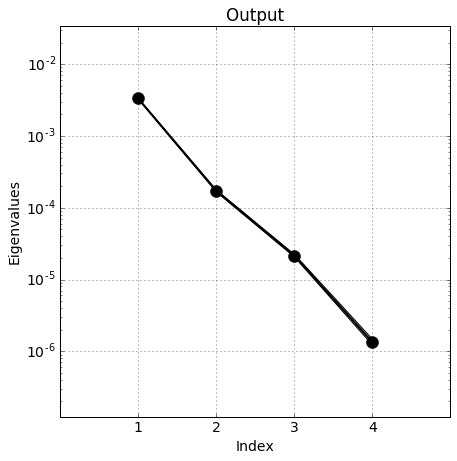

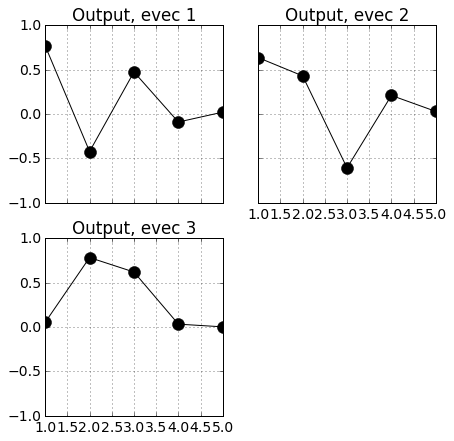

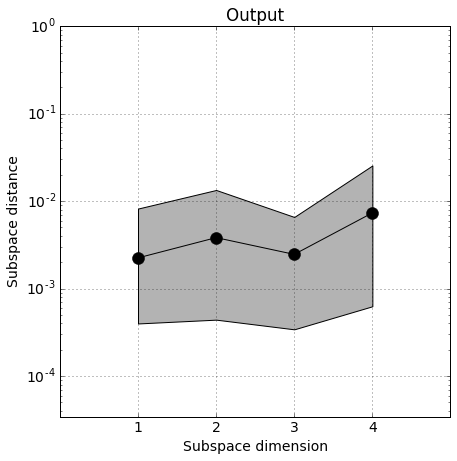

In [6]:
ac.utils.plotters.eigenvalues(ss.eigenvalues[:k],e_br=ss.e_br[:k,:])
ac.utils.plotters.eigenvectors(ss.eigenvectors[:,:3])
ac.utils.plotters.subspace_errors(ss.sub_br[:k,:])

One- and two-d sufficient summary plots.

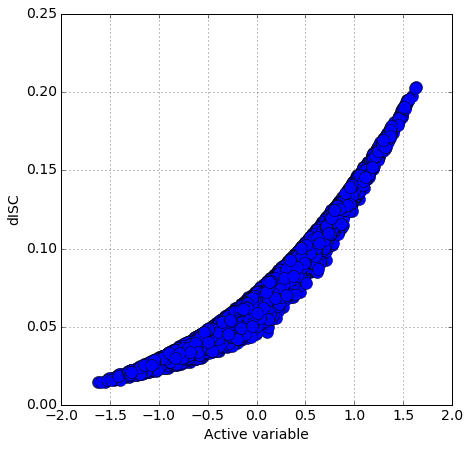

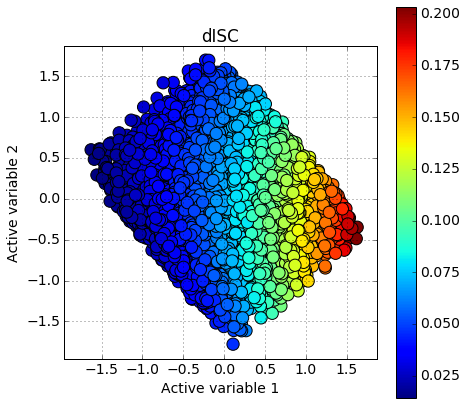

In [7]:
ss.partition(2)
y = np.dot(XX,ss.W1)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)